In [2]:
import ROOT
import math
import uproot
import numpy as np
import mplhep as hep
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
BASEDIR_2017 = '/depot/cms/top/jthiema/AnalysisFramework/TopSpinCorr_FullRunIIUL_January2023/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_Lumiweighted_2017'
BASEDIR_2018 = '/depot/cms/top/jthiema/AnalysisFramework/TopSpinCorr_FullRunIIUL_January2023/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_Lumiweighted_2018'

In [1308]:
# JES_UP_17_fileptr   = uproot.open(BASEDIR_2017 + '/JES_UP/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2017UL.root')
# JES_UP_18_fileptr   = uproot.open(BASEDIR_2018 + '/JES_UP/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2018UL.root')

# Nominal_17_fileptr  = uproot.open(BASEDIR_2017 + '/Nominal/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2017UL.root')
# Nominal_18_fileptr  = uproot.open(BASEDIR_2018 + '/Nominal/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2018UL.root')

# JES_DOWN_17_fileptr = uproot.open(BASEDIR_2017 + '/JES_DOWN/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2017UL.root')
# JES_DOWN_18_fileptr = uproot.open(BASEDIR_2018 + '/JES_DOWN/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2018UL.root')

# gen_b1k_17 = Nominal_17_fileptr['hgen_b1k'].to_numpy()[0]
# gen_b1k_18 = Nominal_18_fileptr['hgen_b1k'].to_numpy()[0]

# reco_b1k_17 = Nominal_17_fileptr['hreco_b1k'].to_numpy()[0]
# reco_b1k_18 = Nominal_18_fileptr['hreco_b1k'].to_numpy()[0]

# M_JES_UP_b1k_17 = JES_UP_17_fileptr['hrecoVsgen_b1k'].to_numpy()[0]
# M_JES_UP_b1k_18 = JES_UP_18_fileptr['hrecoVsgen_b1k'].to_numpy()[0]

# M_Nominal_b1k_17 = Nominal_17_fileptr['hrecoVsgen_b1k'].to_numpy()[0]
# M_Nominal_b1k_18 = Nominal_18_fileptr['hrecoVsgen_b1k'].to_numpy()[0]

# M_JES_DOWN_b1k_17 = JES_DOWN_17_fileptr['hrecoVsgen_b1k'].to_numpy()[0]
# M_JES_DOWN_b1k_18 = JES_DOWN_18_fileptr['hrecoVsgen_b1k'].to_numpy()[0]

JES_UP_17_fileptr   = ROOT.TFile.Open(BASEDIR_2017 + '/JES_UP/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2017UL.root', 'READ')
JES_UP_18_fileptr   = ROOT.TFile.Open(BASEDIR_2018 + '/JES_UP/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2018UL.root', 'READ')

Nominal_17_fileptr  = ROOT.TFile.Open(BASEDIR_2017 + '/Nominal/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2017UL.root', 'READ')
Nominal_18_fileptr  = ROOT.TFile.Open(BASEDIR_2018 + '/Nominal/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2018UL.root', 'READ')

JES_DOWN_17_fileptr = ROOT.TFile.Open(BASEDIR_2017 + '/JES_DOWN/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2017UL.root', 'READ')
JES_DOWN_18_fileptr = ROOT.TFile.Open(BASEDIR_2018 + '/JES_DOWN/emu/histosTUnfold_emu_ttbarsignalplustau_fromDilepton_2018UL.root', 'READ')

In [1309]:
gen_b1k_17 = Nominal_17_fileptr.Get('hgen_b1k')
gen_b1k_18 = Nominal_18_fileptr.Get('hgen_b1k')

reco_b1k_17 = Nominal_17_fileptr.Get('hreco_b1k')
reco_b1k_18 = Nominal_18_fileptr.Get('hreco_b1k')

M_JES_UP_b1k_17 = JES_UP_17_fileptr.Get('hrecoVsgen_b1k')
M_JES_UP_b1k_18 = JES_UP_18_fileptr.Get('hrecoVsgen_b1k')

M_Nominal_b1k_17 = Nominal_17_fileptr.Get('hrecoVsgen_b1k')
M_Nominal_b1k_18 = Nominal_18_fileptr.Get('hrecoVsgen_b1k')

M_JES_DOWN_b1k_17 = JES_DOWN_17_fileptr.Get('hrecoVsgen_b1k')
M_JES_DOWN_b1k_18 = JES_DOWN_18_fileptr.Get('hrecoVsgen_b1k')

### This is where we diverge, either add response matrices or treat them as correlated

In [1310]:
# Construct response matrices

minval = -1 
maxval =  1

finebins   = 48
coarsebins = 24

# gen_17  = ROOT.TH1D("gen_17", "gen_17", coarsebins, minval, maxval)
# gen_18  = ROOT.TH1D("gen_16", "gen_16", coarsebins, minval, maxval)

# reco_17 = ROOT.TH1D("reco_17", "reco_17", finebins, minval, maxval)
# reco_18 = ROOT.TH1D("reco_16", "reco_16", finebins, minval, maxval)

# Nominal_17  = ROOT.TH2D("Nominal_17", "Nominal_17", coarsebins, minval, maxval, finebins, minval,maxval)
# JES_UP_17   = Nominal_17.Clone("JES_UP_17")
# JES_DOWN_17 = Nominal_17.Clone("JES_DOWN_17")

# Nominal_18  = ROOT.TH2D("Nominal_18", "Nominal_18", coarsebins, minval, maxval, finebins, minval,maxval)
# JES_UP_18   = Nominal_18.Clone("JES_UP_18")
# JES_DOWN_18 = Nominal_18.Clone("JES_DOWN_18")

# Nominal_17.SetTitle("Nominal 17")
# JES_UP_17.SetTitle("JES 17 +1#sigma")
# JES_DOWN_17.SetTitle("JES 17 -1#sigma")

# Nominal_18.SetTitle("Nominal 18")
# JES_UP_18.SetTitle("JES 18 +1#sigma")
# JES_DOWN_18.SetTitle("JES 18 -1#sigma")

In [1311]:
# for i in range(len(reco_b1k_17)) :
#     reco_17.SetBinContent(i, reco_b1k_17[i])
    
# for i in range(len(gen_b1k_17)) :
#     gen_17.SetBinContent(i, gen_b1k_17[i])
    
# for i in range(len(reco_b1k_18)) :
#     reco_18.SetBinContent(i, reco_b1k_18[i])

# for i in range(len(gen_b1k_18)) :
#     gen_18.SetBinContent(i, gen_b1k_18[i])

In [1312]:
# # Migration matrices 
# # 2017
# for i in range(1, len(M_JES_UP_b1k_17) + 1) :
#     for j in range(1, len(M_JES_UP_b1k_17[0]) + 1) :
#         JES_UP_17.SetBinContent(i,j, M_JES_UP_b1k_17[i][j])
        
# for i in range(1 ,len(M_Nominal_b1k_17) + 1) :
#     for j in range(1, len(M_Nominal_b1k_17[0]) + 1) :
#         Nominal_17.SetBinContent(i,j, M_Nominal_b1k_17[i][j])
        
# for i in range(1, len(M_JES_DOWN_b1k_17)) :
#     for j in range(1, len(M_JES_DOWN_b1k_17[0])) :
#         JES_DOWN_17.SetBinContent(i,j, M_JES_DOWN_b1k_17[i][j])
        
# # 2018
# for i in range(1, len(M_JES_UP_b1k_18)) :
#     for j in range(1, len(M_JES_UP_b1k_18[0])) :
#         JES_UP_18.SetBinContent(i,j, M_JES_UP_b1k_18[i][j])
        
# for i in range(1, len(M_Nominal_b1k_18)) :
#     for j in range(1, len(M_Nominal_b1k_18[0])) :
#         Nominal_18.SetBinContent(i,j, M_Nominal_b1k_18[i][j])

# for i in range(1, len(M_JES_DOWN_b1k_18)) :
#     for j in range(1, len(M_JES_DOWN_b1k_18[0])) :
#         JES_DOWN_18.SetBinContent(i,j, M_JES_DOWN_b1k_18[i][j])

In [1313]:
%jsroot

In [1314]:
c = ROOT.TCanvas('c', 'c', 800,800)
M_Nominal_b1k_17.Draw('colz')
c.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


In [1315]:
M_Nominal_b1k_17.ProjectionY().Draw("e")
reco_b1k_17.Draw("e same")
c.Draw()

In [1316]:
# Naive addition
reco_added = reco_b1k_17.Clone()
reco_added.Add(reco_b1k_18)

gen_added = gen_b1k_17.Clone()
gen_added.Add(gen_b1k_18)

JES_UP_added = M_JES_UP_b1k_17.Clone()
JES_UP_added.Add(M_JES_UP_b1k_18)

Nominal_added = M_Nominal_b1k_17.Clone()
Nominal_added.Add(M_Nominal_b1k_18)

JES_DOWN_added = M_JES_DOWN_b1k_17.Clone()
JES_DOWN_added.Add(M_JES_DOWN_b1k_18)

True

In [1317]:
orientation  = ROOT.TUnfold.kHistMapOutputHoriz
regMode      = ROOT.TUnfold.kRegModeCurvature
con          = ROOT.TUnfold.kEConstraintArea
mode         = ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

# u = ROOT.MyTUnfoldDensity(M,orientation,regMode,con)
unfolding_obj = ROOT.TUnfoldDensity(Nominal_added, orientation, regMode, con)
unfolding_obj.SetInput(reco_added)

unfolding_obj.AddSysError(JES_UP_added  , "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
unfolding_obj.AddSysError(JES_DOWN_added, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)

# Regularize
nScan  = 100
tauMin = 0.001
tauMax = 1.0
iBest  = 0

ScanResult = ROOT.MakeNullPointer(ROOT.TSpline)
logTauX    = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY    = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve     = ROOT.MakeNullPointer(ROOT.TGraph)

# unfolding_obj.ScanLcurve(nScan,tauMin, tauMax, lCurve, logTauX, logTauY)
unfolding_obj.DoUnfold(-1.2)

# nScan  = 30
# tauMin = 0.000001
# tauMax = 1.0

# mode           = ROOT.TUnfoldDensity.kEScanTauRhoAvg
# distribution   = ""
# projectionMode = ""
# axisSteering   =  "*[UOB]"

# unfolding_obj.ScanTau(nScan, tauMin, tauMax, ScanResult, mode, distribution, projectionMode, lCurve, logTauX, logTauY)

# Get output... DOES NOT CONTAIN SYSTEMATICS. 
unfolding_op = unfolding_obj.GetOutput("unfolding_op")

# Get systematic shifts of output
unfolding_op_up = unfolding_obj.GetDeltaSysSource("Up", "o_upshift", "+1#sigma")
unfolding_op_dn = unfolding_obj.GetDeltaSysSource("Dn", "o_dnshift", "-1#sigma")
unfolding_op_up.SetLineStyle(2)
unfolding_op_dn.SetLineStyle(2)

# Get various covariances
cov_tot       = unfolding_obj.GetEmatrixTotal("cov", "Covariance Matrix")
# cov_sys     = unfolding_obj.GetEmatrixSysUncorr("cov_sys" , "Covariance Matrix from Uncorrelated Uncertainties")
#cov_sys      = unfolding_obj.GetEmatrixSysSource("cov_sys" , "Covariance Matrix from Systematic Uncertainties")
cov_stat_data = unfolding_obj.GetEmatrixInput("cov_stat_data", "Covariance Matrix from Stat Uncertainties of Input Data")

# Now prepare various distributions. 
unfolding_unc_stat = unfolding_op.Clone("unfolding_unc_stat") # Unfolding and stat unc
unfolding_unc_sys  = unfolding_op.Clone("unfolding_unc_sys")  # Syst uncertainty
unfolding_unc_tot  = unfolding_op.Clone("unfolding_unc_tot")  # Total uncertainty

unfolding_unc_sys.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output

for i in range( 0, unfolding_op.GetNbinsX() + 1):
    
    unc_tot = ROOT.TMath.Sqrt( cov_tot.GetBinContent(i,i) )
    
    unfolding_unc_tot.SetBinContent(i, unc_tot)    
    unfolding_op.SetBinError(i, unc_tot)
    
    yup = abs(unfolding_op_up.GetBinContent(i))
    ydn = abs(unfolding_op_dn.GetBinContent(i))
    
    delta_y = ROOT.TMath.Sqrt( (yup**2 + ydn**2) )
    
    unfolding_unc_sys.SetBinContent(i, delta_y)
    unfolding_unc_stat.SetBinContent(i, math.sqrt(cov_stat_data.GetBinContent(i,i) ))

gen_added_2 = gen_added.Clone("gen_added_2")
gen_added_2.Rebin(finebins//coarsebins)

unfolding_op.SetMarkerStyle(20)
unfolding_op.SetMarkerColor(1)

unfolding_unc_stat.SetMarkerStyle(0)
unfolding_unc_stat.SetLineColor(2)

gen_added_2.SetMarkerStyle(21)
gen_added_2.SetMarkerColor(4)
gen_added_2.SetMarkerStyle(4)
gen_added_2.SetLineColor(4)

c = ROOT.TCanvas("c","c")
unfolding_op.SetMinimum(0.0)
unfolding_op.Draw()
unfolding_unc_stat.Draw("e same")
gen_added_2.Draw("e same")

leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry(unfolding_op      , "Unfolded, total unc",'p')
leg2.AddEntry(unfolding_unc_stat, "Stat+unfolding unc",'l')
leg2.AddEntry(gen_added_2, "Gen/True",'p')
leg2.Draw()
c.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 48 input bins and 24 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:ttbargen[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #25 (xaxis:ttbargen[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]


In [1318]:
print (lCurve)
if lCurve:
    cl = ROOT.TCanvas("cl", "cl", 500, 500)
    lCurve.Draw("alp")
    cl.Draw()

<cppyy.gbl.TGraph object at 0x(nil)>


In [1319]:
c2       = ROOT.TCanvas("c2", "c2", 500, 500)
closure  = gen_added_2.Clone("closure")
closure2 = gen_added_2.Clone("closure2")

closure.SetMarkerColor(1)
closure.SetLineColor(1)

closure2.SetMarkerColor(2)
closure2.SetLineColor(2)

closure.SetTitle("true / unfolded")

closure.Divide(unfolding_op)
closure2.Divide(unfolding_unc_stat)

closure.Draw('e1')
closure2.Draw('e1 same')
# closure.SetMaximum(1.1)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry(closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry(closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
Error in <TH1D::Divide>: Cannot divide histograms with different number of bins
Error in <TH1D::Divide>: Cannot divide histograms with different number of bins


In [1320]:
ccov = ROOT.TCanvas("ccov", "Covariance Matrix from Stat Uncertainties on data", 400, 400)
cov_stat_data.Draw('colz')
#ccov.SetLogz()
ccov.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: ccov


In [1321]:
# ccov_sys = ROOT.TCanvas("ccov_uncorr", "Covariance Matrix from Systematic Uncertainties", 400, 400)
# cov_sys.Draw('colz')
# #ccov_uncorr.SetLogz()
# ccov_uncorr.Draw()

In [1322]:
# unc_stack = ROOT.THStack("unc_stack", "Uncertainties")
# unc_stack.Add(unfolding_unc_stat, "hist" )
# unc_stack.Add(unfolding_unc_sys , "hist" )
# #o_up.Divide(o)
# #o_dn.Divide(o)


# c_sys = ROOT.TCanvas("c_sys", "c_sys", 500, 500)
# unc_stack.Draw("nostack")
# unc_stack.SetMaximum( 1.0 * unc_stack.GetMaximum())
# #o_unc.SetMinimum(-0.2)
# #o_unc.SetMaximum(+0.2)
# legsys = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
# legsys.SetFillColor(0)
# legsys.SetBorderSize(0)
# legsys.AddEntry( o_unctot, 'Total', 'l')
# legsys.AddEntry( o_sys, 'Syst', 'l')
# legsys.Draw()
# c_sys.Draw()

### Treatment for correlated matrices

In [1323]:
import mplhep as hep
hep.style.use(hep.style.ATLAS)
import matplotlib as mpl

In [1324]:
# Number of finebins = 48, coarsebins = 24, add 2 for over and underflow
M_JES_UP_2017   = np.zeros((26,50))
M_Nominal_2017  = np.zeros((26,50))
M_JES_DOWN_2017 = np.zeros((26,50))

M_JES_UP_2018   = np.zeros((26,50))
M_Nominal_2018  = np.zeros((26,50))
M_JES_DOWN_2018 = np.zeros((26,50))

for i in range(0, M_Nominal_b1k_17.GetNbinsX()+2):    
    for j in range(0, M_Nominal_b1k_17.GetNbinsY()+2):   
        
        M_JES_UP_2017[i][j]   = M_JES_UP_b1k_17.GetBinContent(i,j)
        M_Nominal_2017[i][j]  = M_Nominal_b1k_17.GetBinContent(i,j)
        M_JES_DOWN_2017[i][j] = M_JES_DOWN_b1k_17.GetBinContent(i,j)
        
for i in range(0, M_Nominal_b1k_18.GetNbinsX()+2):    
    for j in range(0, M_Nominal_b1k_18.GetNbinsY()+2):  
        
        M_JES_UP_2018[i][j]   = M_JES_UP_b1k_18.GetBinContent(i,j)
        M_Nominal_2018[i][j]  = M_Nominal_b1k_18.GetBinContent(i,j)
        M_JES_DOWN_2018[i][j] = M_JES_DOWN_b1k_18.GetBinContent(i,j)

$$(\delta M_{Run2}^{JES\_UP})^{2} = $$
$\text{Uncorrelated part}$ :

$$ (1 - \rho_{16,17} - \rho_{16,18}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom})^{2} \, + $$ 
$$ (1 - \rho_{16,17} - \rho_{17,18}) \: (M_{17}^{JES \_UP} - M_{17}^{Nom})^{2} \, + $$
$$ (1 - \rho_{17,18} - \rho_{16,18}) \: (M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$

$\text{Correlated part}$ :

$$ (\rho_{16,17}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{17}^{JES \_UP} - M_{17}^{Nom})^{2} \, + $$ 
$$ (\rho_{17,18}) \: (M_{17}^{JES \_UP} - M_{17}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$
$$ (\rho_{16,18}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$

$$ (\rho_{16,17,18}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{17}^{JES \_UP} - M_{17}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2}$$

$\text{Finally, }$

$$ M_{Run2}^{JES \_UP} = M_{16}^{Nom} + M_{17}^{Nom} + M_{18}^{Nom} + \delta M_{Run2}^{JES \_UP} $$

$\text{Which is then the input response matrix for unfolding}$

In [1325]:
# Simple approach for 2 eras

$$ $$
$$(\delta M_{Run2}^{JES\_UP})^{2} = $$
$\text{Uncorrelated part}$ :

$$ (1 - \rho_{17,18}) \: (M_{17}^{JES \_UP} - M_{17}^{Nom})^{2} \, + $$
$$ (1 - \rho_{17,18}) \: (M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$

$\text{Correlated part}$ :

$$ (\rho_{17,18}) \: (M_{17}^{JES \_UP} - M_{17}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$

$\text{Finally, }$

$$ M_{Run2}^{JES \_UP} =  M_{17}^{Nom} + M_{18}^{Nom} + \delta M_{Run2}^{JES \_UP} $$

$$ $$
$$ $$
$$ \text{Similarly for down,} $$

$$(\delta M_{Run2}^{JES\_DOWN})^{2} = $$
$\text{Uncorrelated part}$ :

$$ (1 - \rho_{17,18}) \: (M_{17}^{Nom} - M_{17}^{JES \_DOWN})^{2} \, + $$
$$ (1 - \rho_{17,18}) \: (M_{18}^{Nom} - M_{18}^{JES \_DOWN})^{2} \, + $$

$\text{Correlated part}$ :

$$ (\rho_{17,18}) \: (M_{17}^{Nom} - M_{17}^{JES \_DOWN} + M_{18}^{Nom} - M_{18}^{JES \_DOWN})^{2} \, + $$

$\text{Finally, }$

$$ M_{Run2}^{JES \_DOWN} =  M_{17}^{Nom} + M_{18}^{Nom} - \delta M_{Run2}^{JES \_DOWN} $$

$\text{Where $\delta M_{Run2}$, is element-wise square root.} $
$\text{This then the input response matrix for unfolding}$

In [1326]:
# ISSUE :

$ \text{Consider 2 sys response matrices} : $
$\begin{pmatrix}
 8 & 12 \\           
11 & 11 
\end{pmatrix}$ and 
$\begin{pmatrix}
 9 & 11 \\           
11 & 10 
\end{pmatrix}$

$ \text{And nominal response matrices} : $
$\begin{pmatrix}
10 & 10 \\           
10 & 10 
\end{pmatrix}$ and 
$\begin{pmatrix}
10 & 10 \\           
10 & 10 
\end{pmatrix}$

$ \text{Now if we treat the systs as fully correlated and add them we get } : $
$\begin{pmatrix}
17 & 23 \\           
22 & 21 
\end{pmatrix}$

$$ $$
$ \text{Assume} \, \rho_{16,17} =1, \, \rho_{16,16} = \, \rho_{17,17} = \, 0 \\ $
$$ (\delta M_{16,17}^{JES\_UP})^{2} = \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{17}^{JES \_UP} - M_{17}^{Nom})^{2} \, \\ $$ 
$$ M_{16,17}^{JES \_UP} = M_{16}^{Nom} + M_{17}^{Nom} + \delta M_{16,17}^{JES \_UP} $$

$$ $$
$ \text{If we follow the above recipe we get } : $
$\begin{pmatrix}
(-2 -1)^{2} & (2+1)^{2} \\           
(1+1)^{2} & (1+1)^{2} 
\end{pmatrix}$ = 
$\begin{pmatrix}
\sqrt{9} & \sqrt{9} \\           
\sqrt{4} & \sqrt{4} 
\end{pmatrix}$ =
$\begin{pmatrix}
3 & 3 \\           
2 & 2 
\end{pmatrix}$ 

$ \text{Finally our correlated response matrix would be } : $
$\begin{pmatrix}
23 & 23 \\           
22  & 22 
\end{pmatrix}$ 

$ \text{Meaning, that downward fluctuations in the UP reponse matrix get wiped out}$ 
$ \text{Similarily upward fluctuations in the DOWN response matrix get wiped out} $

In [1327]:
# Implementation

In [1359]:
del_17_18 = 0.3

del_17_17 = (1 - del_17_18)
del_18_18 = (1 - del_17_18)

# correlation 1617, 1718, 1816
# Lumi_correlation = [0.3, 0.3, 0.3]

# del_16_17 = Lumi_correlation[0]
# del_17_18 = Lumi_correlation[1]
# del_16_18 = Lumi_correlation[2]

# del_16_16 = (1 - del_16_17 - del_16_18)
# del_17_17 = (1 - del_16_17 - del_17_18)
# del_18_18 = (1 - del_17_18 - del_16_18)

# Element wise square of each element
delta_M_2_JES_UP = \
del_18_18 * np.square((M_JES_UP_2018  - M_Nominal_2018)) + \
del_17_17 * np.square((M_JES_UP_2017  - M_Nominal_2017)) + \
del_17_18 * np.square(((M_JES_UP_2018 - M_Nominal_2018)  +  (M_JES_UP_2017 - M_Nominal_2017)))  

delta_M_2_JES_DOWN = \
del_18_18 * np.square((M_Nominal_2018 - M_JES_DOWN_2018 )) + \
del_17_17 * np.square((M_Nominal_2017 - M_JES_DOWN_2017 )) + \
del_17_18 * np.square(((M_Nominal_2018 - M_JES_DOWN_2018 )  + (M_Nominal_2017 - M_JES_DOWN_2017)))

# Element wise square root of the matrix
del_M_JES_UP_17_18_corr   = np.sqrt(delta_M_2_JES_UP)
del_M_JES_DOWN_17_18_corr = np.sqrt(delta_M_2_JES_DOWN)

$$ $$
$$ \delta M_{Run2}^{JES\_UP} = $$
$\text{Uncorrelated part}$ :

$$ \sqrt{1 - \rho_{17,18}} \: (M_{17}^{JES \_UP} - M_{17}^{Nom}) \, + $$
$$ \sqrt{1 - \rho_{17,18}} \: (M_{18}^{JES \_UP} - M_{18}^{Nom}) \, + $$

$\text{Correlated part}$ :

$$ \sqrt{\rho_{17,18}} \: (M_{17}^{JES \_UP} - M_{17}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom}) \, + $$

$\text{Finally, }$

$$ M_{Run2}^{JES \_UP} =  M_{17}^{Nom} + M_{18}^{Nom} + \delta M_{Run2}^{JES \_UP} $$

$$ $$
$$ $$
$$ \text{Similarly for down,} $$

$$ \delta M_{Run2}^{JES\_DOWN} = $$
$\text{Uncorrelated part}$ :

$$ \sqrt{1 - \rho_{17,18}}  \: (M_{17}^{Nom} - M_{17}^{JES \_DOWN}) \, + $$
$$ \sqrt{1 - \rho_{17,18}}  \: (M_{18}^{Nom} - M_{18}^{JES \_DOWN}) \, + $$

$\text{Correlated part}$ :

$$ \sqrt{\rho_{17,18}} \: (M_{17}^{Nom} - M_{17}^{JES \_DOWN} + M_{18}^{Nom} - M_{18}^{JES \_DOWN}) \, + $$

$\text{Finally, }$

$$ M_{Run2}^{JES \_DOWN} =  M_{17}^{Nom} + M_{18}^{Nom} - \delta M_{Run2}^{JES \_DOWN} $$

$\text{Which is then the input response matrix for unfolding}$

In [1329]:
# ISSUE : Same for rho = 0 and rho = 1

In [1331]:
# del_17_18 = 0.5

# del_17_17 = (1 - del_17_18)
# del_18_18 = (1 - del_17_18)

# del_M_JES_UP_17_18_corr = \
# math.sqrt(del_17_17) * (M_JES_UP_2017  - M_Nominal_2017) + \
# math.sqrt(del_18_18) * (M_JES_UP_2018  - M_Nominal_2018) + \
# math.sqrt(del_17_18) * ((M_JES_UP_2018 - M_Nominal_2018) +  (M_JES_UP_2017 - M_Nominal_2017))

# del_M_JES_DOWN_17_18_corr = \
# math.sqrt(del_17_17) * (M_Nominal_2017  - M_JES_DOWN_2017) + \
# math.sqrt(del_18_18) * (M_Nominal_2018  - M_JES_DOWN_2018) + \
# math.sqrt(del_17_18) * ((M_Nominal_2018 - M_JES_DOWN_2018) +  (M_Nominal_2017 - M_JES_DOWN_2017))

In [1360]:
del_M_JES_UP_17_18_corr == (M_JES_UP_2018 - M_Nominal_2018) + (M_JES_UP_2017 - M_Nominal_2017)

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [1361]:
del_M_JES_UP_17_18_corr + M_Nominal_2018 + M_Nominal_2017

array([[7.42504311e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.48356381e+04, 1.06349827e+03, 1.06465936e+03, ...,
        2.33100161e+01, 2.30565003e+01, 0.00000000e+00],
       [7.14310678e+04, 3.15916454e+02, 6.58997424e+02, ...,
        3.38457103e+01, 3.13429059e+01, 0.00000000e+00],
       ...,
       [6.65883999e+04, 4.13095417e+01, 3.62803448e+01, ...,
        1.29284646e+03, 1.39235811e+03, 0.00000000e+00],
       [6.67507819e+04, 3.96287016e+01, 3.62095978e+01, ...,
        1.56459215e+03, 1.84615765e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [1362]:
M_JES_UP_2017 + M_JES_UP_2018

array([[7.42504311e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.46835282e+04, 1.06873514e+03, 1.06791417e+03, ...,
        2.31819371e+01, 2.24817182e+01, 0.00000000e+00],
       [7.11946764e+04, 3.17507107e+02, 6.63031199e+02, ...,
        3.08439719e+01, 2.86038768e+01, 0.00000000e+00],
       ...,
       [6.59361898e+04, 4.12618800e+01, 3.56900080e+01, ...,
        1.29551503e+03, 1.39399425e+03, 0.00000000e+00],
       [6.60816132e+04, 3.85762554e+01, 3.65396421e+01, ...,
        1.56930329e+03, 1.85068661e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [1363]:
# This should only close if rho == 1
np.allclose(M_Nominal_2018 + M_Nominal_2017 + del_M_JES_UP_17_18_corr, M_JES_UP_2017 + M_JES_UP_2018)

False

In [1364]:
# This should only close if rho == 1
np.allclose(M_Nominal_2018 + M_Nominal_2017 - del_M_JES_DOWN_17_18_corr, M_JES_DOWN_2017 + M_JES_DOWN_2018)

False

In [1365]:
# (np.matrix([[100,90], [90,100]]) - np.matrix([[101,89], [89,101]]) )**2
# np.square((np.matrix([[100,90], [90,100]]) - np.matrix([[101,89], [89,101]]) ))

# res = np.matrix([[97,101], [102,100]]) - np.matrix([[100,100], [100,100]])
# np.where(res >=0, 1, -1)

In [1366]:
M_JES_UP_17_18_corr   = M_Nominal_2017 + M_Nominal_2018 + del_M_JES_UP_17_18_corr
M_JES_DOWN_17_18_corr = M_Nominal_2017 + M_Nominal_2018 - del_M_JES_DOWN_17_18_corr # This was one mistake

In [1367]:
JES_UP_corr = JES_UP_added.Clone()
# JES_UP_corr.Reset()

JES_DOWN_corr = JES_DOWN_added.Clone()
# JES_DOWN_corr.Reset()

for i in range(0, M_Nominal_b1k_17.GetNbinsX() + 2):    
    for j in range(0, M_Nominal_b1k_17.GetNbinsY() + 2):
        JES_UP_corr.SetBinContent(i,j, M_JES_UP_17_18_corr[i][j])
        JES_DOWN_corr.SetBinContent(i,j,M_JES_DOWN_17_18_corr[i][j])
#         JES_UP_corr.SetBinContent(i,j, M_JES_UP_2017[i][j] + M_JES_UP_2018[i][j])
#         JES_DOWN_corr.SetBinContent(i,j,M_JES_DOWN_2017[i][j] + M_JES_DOWN_2018[i][j])

### Note the lobsided difference in added matrices and those added with corr recipe

In [1368]:
np.max(((M_JES_UP_2017 + M_JES_UP_2018) - M_JES_UP_17_18_corr), axis=0)

array([ 0.        ,  5.23687128,  4.03377556,  6.60925299,  4.49912431,
        9.90519472,  6.05714132, 10.20148939,  7.03376956,  7.20077721,
        6.14905015,  7.45929154,  4.87845334,  5.86691805,  5.95467645,
        5.11813112,  4.70964981,  4.2816505 ,  4.09989849,  4.8401    ,
        4.76063648,  4.50903133,  3.20881995,  4.24146363,  3.67878066,
        3.03319635,  4.98706365,  4.10319277,  2.46452354,  3.66201981,
        4.84699862,  2.99545941,  3.6185006 ,  2.97945838,  3.07767253,
        3.22347972,  3.53950945,  4.60366076,  3.99694137,  5.5925895 ,
        3.29712553,  3.90353407,  5.05264   ,  3.18648893,  4.78821163,
        6.92424013,  3.71196038,  4.71114106,  4.52895311,  0.        ])

In [1369]:
np.min(((M_JES_UP_2017 + M_JES_UP_2018) - M_JES_UP_17_18_corr), axis=0)

array([-669.16872558,   -1.76611378,   -4.04824714,   -5.44058315,
         -2.61386843,  -17.88135946,   -4.9150979 ,   -4.92145529,
        -15.3405184 ,  -14.58197545,  -18.71443484,  -11.41185419,
        -23.49807042,  -19.44535636,   -7.32197121,  -11.97555961,
         -7.97580848,  -15.09896188,   -9.28508619,   -2.17549409,
        -10.669501  ,  -14.56557422,  -25.37605533,  -11.20069078,
        -11.71341749,   -4.03371631,   -8.26592885,   -8.4966917 ,
         -6.87343053,   -9.04346907,   -8.19339027,   -7.76307167,
         -7.62218141,  -10.11412093,   -9.32724877,   -7.39804757,
        -14.37542922,  -11.7471303 ,   -6.53024801,  -14.30668992,
         -4.64413772,  -10.7846585 ,  -10.77795812,   -7.54408947,
         -8.59538282,   -6.66196437,   -7.1237428 ,   -7.78024872,
         -4.74879516,    0.        ])

In [1370]:
np.min(((M_JES_DOWN_2017 + M_JES_DOWN_2018) - M_JES_DOWN_17_18_corr), axis=0)

array([  0.        ,  -5.07621662,  -4.4757864 ,  -7.33715056,
        -7.34135555, -10.10319073,  -7.12999   ,  -6.31832838,
        -8.96568668,  -6.3670303 ,  -6.85313055,  -6.00163371,
        -6.94374586,  -5.45846843,  -4.70720405,  -5.83917388,
        -5.30421391,  -4.76833962,  -5.80125734,  -4.48230374,
        -6.13679706,  -4.04634903,  -4.33319519,  -2.71038735,
        -3.91144148,  -4.62524761,  -3.80637141,  -5.11935839,
        -3.80851153,  -4.34486912,  -3.53648821,  -4.45545064,
        -3.30323346,  -3.25074317,  -3.64561252,  -4.41659298,
        -2.73457732,  -3.55878564,  -3.98256032,  -3.48144463,
        -4.70879638,  -4.08398393,  -4.61835886,  -4.32981392,
        -4.47183066,  -5.91811533,  -5.84217773,  -4.52106412,
        -6.61583174,   0.        ])

In [1371]:
np.max(((M_JES_DOWN_2017 + M_JES_DOWN_2018) - M_JES_DOWN_17_18_corr), axis=0)

array([662.5024657 ,   1.14557731,   2.80171634,   2.54876401,
         4.54902901,   3.27388802,  14.86181666,   9.2019721 ,
        10.86804463,   3.40574152,   4.37541573,  13.83042877,
         8.0898347 ,   9.43792594,  12.16120817,  19.4859279 ,
        13.53528397,  10.52378353,   6.39020915,   8.61313561,
         6.06563823,   3.43421267,   6.80085697,   4.77794675,
         7.18330223,  13.15204624,  11.17208294,   8.94395065,
        13.46002866,  11.58702733,  10.44108371,   4.71027676,
        12.4306635 ,   4.0642971 ,   8.49546698,  11.19126244,
         7.73092832,  10.19669812,   8.92449091,   2.98488529,
         9.05334014,  11.07988515,  10.37721378,  10.88116028,
        11.63011422,   7.47645569,   8.09166501,   4.04027682,
         3.25290461,   0.        ])

In [1372]:
cratio = ROOT.TCanvas("cratio", "cratio", 800, 1200)
cratio.Divide(2,3)

cratio.cd(1)
JES_UP_corr.SetTitle('JES UP Correlated')
JES_UP_corr.Draw("colz")
# JES_UP_corr.Scale(1/JES_UP_corr.Integral())

cratio.cd(2)
JES_DOWN_corr.SetTitle('JES DOWN Correlated')
JES_DOWN_corr.Draw("colz")

cratio.cd(3)
JES_UP_added.SetTitle('JES UP Added')
JES_UP_added.Draw("colz")
# JES_UP_added.Scale(1/JES_UP_added.Integral())

cratio.cd(4)
JES_DOWN_added.SetTitle('JES DOWN Added')
JES_DOWN_added.Draw("colz")

cratio.cd(5)
ratio_UP = JES_UP_corr.Clone()
ratio_UP.Divide(JES_UP_added)
ratio_UP.SetTitle('Ratio JES UP CORR / JES UP ADDED')
ratio_UP.Draw("colz")

cratio.cd(6)
ratio_DOWN = JES_DOWN_corr.Clone()
ratio_DOWN.Divide(JES_DOWN_added)
ratio_DOWN.SetTitle('Ratio JES DOWN CORR / JES DOWN ADDED')
ratio_DOWN.Draw("colz")

cratio.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cratio


In [1373]:
orientation  = ROOT.TUnfold.kHistMapOutputHoriz
regMode      = ROOT.TUnfold.kRegModeCurvature
con          = ROOT.TUnfold.kEConstraintArea 
mode         = ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

unfolding_obj_corr = ROOT.TUnfoldDensity(Nominal_added, orientation, regMode, con)

# Question : should this also be treated differently ?
unfolding_obj_corr.SetInput(reco_added)

unfolding_obj_corr.AddSysError(JES_UP_corr  , "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
unfolding_obj_corr.AddSysError(JES_DOWN_corr, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)


# Regularize
nScan  = 100
tauMin = 0.001
tauMax = 1.0
iBest  = 0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve  = ROOT.MakeNullPointer(ROOT.TGraph)

# unfolding_obj_corr.ScanLcurve(nScan,tauMin, tauMax, lCurve, logTauX, logTauY)
# unfolding_obj_corr.ScanLcurve(nScan,tauMin, tauMax, lCurve, logTauX, logTauY)
unfolding_obj_corr.DoUnfold(-1.2)

# Get output... DOES NOT CONTAIN SYSTEMATICS. 
unfolding_op_corr = unfolding_obj_corr.GetOutput("unfolding_op_corr")

# Get systematic shifts of output
unfolding_op_up_corr = unfolding_obj_corr.GetDeltaSysSource("Up", "o_upshift", "+1#sigma")
unfolding_op_dn_corr = unfolding_obj_corr.GetDeltaSysSource("Dn", "o_dnshift", "-1#sigma")
unfolding_op_up_corr.SetLineStyle(2)
unfolding_op_dn_corr.SetLineStyle(2)

# Get various covariances
cov_tot_corr       = unfolding_obj_corr.GetEmatrixTotal("cov_corr", "Covariance Matrix")
# cov_sys          = unfolding_obj_corr.GetEmatrixSysUncorr("cov_uncorr" , "Covariance Matrix from Uncorrelated Uncertainties")
# cov_sys_corr     = unfolding_obj_corr.GetEmatrixSysSource("cov_sys"  , "Covariance Matrix from Systematic Uncertainties")
cov_stat_data_corr = unfolding_obj_corr.GetEmatrixInput("cov_stat_data", "Covariance Matrix from Stat Uncertainties of Input Data")

# Now prepare various distributions. 
unfolding_unc_stat_corr = unfolding_op_corr.Clone("unfolding_unc_stat_corr") # Unfolding and stat unc
unfolding_unc_sys_corr  = unfolding_op_corr.Clone("unfolding_unc_sys_corr")  # Syst uncertainty
unfolding_unc_tot_corr  = unfolding_op_corr.Clone("unfolding_unc_tot_corr")  # Total uncertainty

unfolding_unc_sys_corr.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output

for i in range(0, unfolding_op_corr.GetNbinsX() + 1):
    
    unc_tot = ROOT.TMath.Sqrt(cov_tot_corr.GetBinContent(i,i))
    
    unfolding_unc_tot_corr.SetBinContent(i, unc_tot)    
    unfolding_op_corr.SetBinError(i, unc_tot)
    
    yup_corr = abs(unfolding_op_up_corr.GetBinContent(i))
    ydn_corr = abs(unfolding_op_dn_corr.GetBinContent(i))
    
    delta_y_corr = ROOT.TMath.Sqrt( (yup_corr**2 + ydn_corr**2) )
    
    unfolding_unc_sys_corr.SetBinContent(i , delta_y_corr)
    unfolding_unc_stat_corr.SetBinContent(i, math.sqrt(cov_stat_data_corr.GetBinContent(i,i)))

gen_added_2 = gen_added.Clone("gen_added_2")
gen_added_2.Rebin(finebins//coarsebins)

unfolding_op_corr.SetMarkerStyle(20)
unfolding_op_corr.SetMarkerColor(1)

unfolding_unc_stat_corr.SetMarkerStyle(0)
unfolding_unc_stat_corr.SetLineColor(2)

gen_added_2.SetMarkerStyle(21)
gen_added_2.SetMarkerColor(4)
gen_added_2.SetMarkerStyle(4)
gen_added_2.SetLineColor(4)

c = ROOT.TCanvas("c","c")
unfolding_op_corr.SetMinimum(0.0)
unfolding_op_corr.Draw()
unfolding_unc_stat_corr.Draw("e same")
gen_added_2.Draw("e same")

leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry(unfolding_op_corr      , "Unfolded, total unc",'p')
leg2.AddEntry(unfolding_unc_stat_corr, "Stat+unfolding unc",'l')
leg2.AddEntry(gen_added_2, "Gen/True",'p')
leg2.Draw()
c.Draw()

TFile::Append:0: RuntimeWarning: Replacing existing TH1: unfolding_op_corr (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: o_upshift (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: o_dnshift (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: cov_corr (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: cov_stat_data (Potential memory leak).
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 48 input bins and 24 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:ttbargen[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #25 (xaxis:ttbargen[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 ax

In [1374]:
unfolding_op_dn_corr.GetBinContent(24)

160.94581743351898

In [1375]:
unfolding_op_dn.GetBinContent(24)

644.6773076740808

In [1376]:
print (lCurve)
if lCurve:
    cl = ROOT.TCanvas("cl", "cl", 500, 500)
    lCurve.Draw("alp")
    cl.Draw()

<cppyy.gbl.TGraph object at 0x(nil)>


In [1377]:
ccov = ROOT.TCanvas("ccov", "Covariance Matrix for Stat Uncertainties on data", 400, 400)
cov_stat_data.Draw('colz')
#ccov.SetLogz()
ccov.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: ccov


In [1378]:
# ccov = ROOT.TCanvas("ccov", "Covariance Matrix for Stat Uncertainties on data", 400, 400)
# # cov_tot.Draw('colz')
# # cov_tot_corr.Draw('colz')
# # ccov.SetLogz()
# ccov.Draw()

In [1379]:
c2       = ROOT.TCanvas("c2", "c2", 500, 500)
closure  = gen_added_2.Clone("closure")
closure2 = gen_added_2.Clone("closure2")

closure.SetMarkerColor(1)
closure.SetLineColor(1)

closure2.SetMarkerColor(2)
closure2.SetLineColor(2)

closure.SetTitle("true / unfolded")

closure.Divide(unfolding_op_corr)
closure2.Divide(unfolding_unc_stat_corr)

closure.Draw('e1')
closure2.Draw('e1 same')
#closure.SetMaximum(1.1)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry(closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry(closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
Error in <TH1D::Divide>: Cannot divide histograms with different number of bins
Error in <TH1D::Divide>: Cannot divide histograms with different number of bins


In [1380]:
uncorr_sys = []
corr_sys   = []

uncorr_stat = []
corr_stat   = []

for i in range(1, unfolding_op_corr.GetNbinsX() + 1) :
    uncorr_sys.append(unfolding_unc_sys.GetBinContent(i))
    corr_sys.append(unfolding_unc_sys_corr.GetBinContent(i))

    uncorr_stat.append(unfolding_unc_stat.GetBinContent(i))
    corr_stat.append( unfolding_unc_stat_corr.GetBinContent(i))

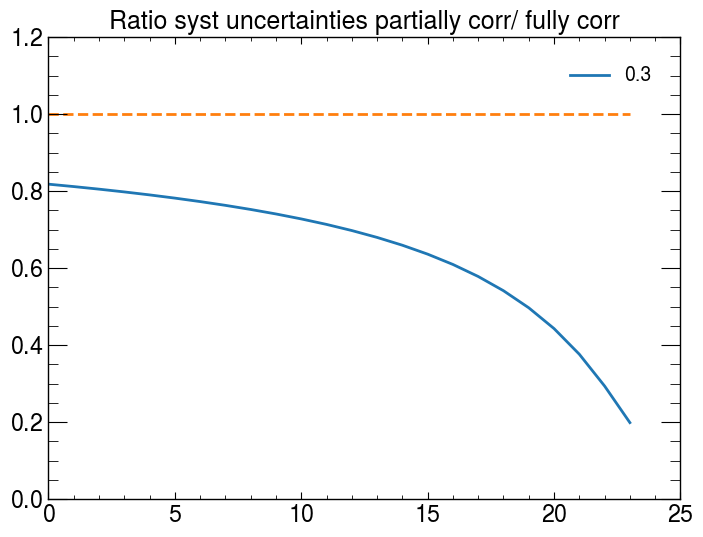

In [1381]:
# plt.plot(uncorr_sys)
# plt.plot(corr_sys)
plt.title('Ratio syst uncertainties partially corr/ fully corr', fontsize=18)
plt.plot(np.divide(np.array(corr_sys), np.array(uncorr_sys)), label=del_17_18)
plt.plot(np.ones(len(corr_sys)), '--')
plt.legend()
#plt.ylim(0.9,1.1)

(0.95, 1.05)

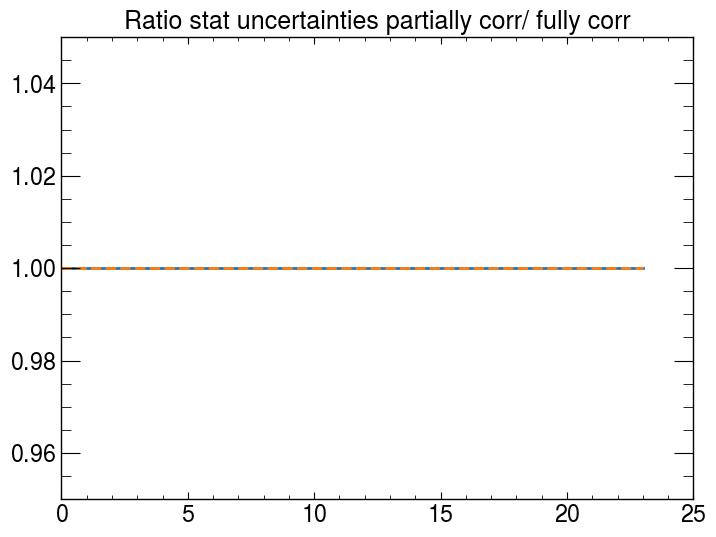

In [1354]:
# plt.plot(uncorr_stat)
# plt.plot(corr_stat)
plt.title('Ratio stat uncertainties partially corr/ fully corr' , fontsize=18)
plt.plot(np.divide(np.array(corr_stat), np.array(uncorr_stat)))
plt.plot(np.ones(len(corr_sys)), '--')
plt.ylim(0.95,1.05)

In [1355]:
corr_sys

[5618.815676973501,
 5431.529729911539,
 5244.196232518155,
 5056.700867792946,
 4868.888819775374,
 4680.589095541477,
 4491.6329664969035,
 4301.867562721282,
 4111.166024370798,
 3919.4341584206186,
 3726.6138842491546,
 3532.684142130399,
 3337.659540607987,
 3141.587987724586,
 2944.5471733715162,
 2746.640697112964,
 2547.993783455593,
 2348.7489698733257,
 2149.0624699583122,
 1949.1016832357564,
 1749.0452659189318,
 1549.0877367332475,
 1349.4539260356926,
 1150.4347657209312]

In [1356]:
uncorr_sys

[3973.102667425252,
 3840.671504236795,
 3708.206717886536,
 3575.627474048296,
 3442.824301306538,
 3309.6762894051903,
 3176.0641292110117,
 3041.879725366668,
 2907.0333744163327,
 2771.458471833411,
 2635.1139484165183,
 2497.984912690587,
 2360.0816944558846,
 2221.4381698142547,
 2082.10927381468,
 1942.1682624115226,
 1801.7036827026168,
 1660.8163239023459,
 1519.6166457010324,
 1378.2230174381164,
 1236.7617681335032,
 1095.3704432969994,
 954.2080219986482,
 813.4802241540274]

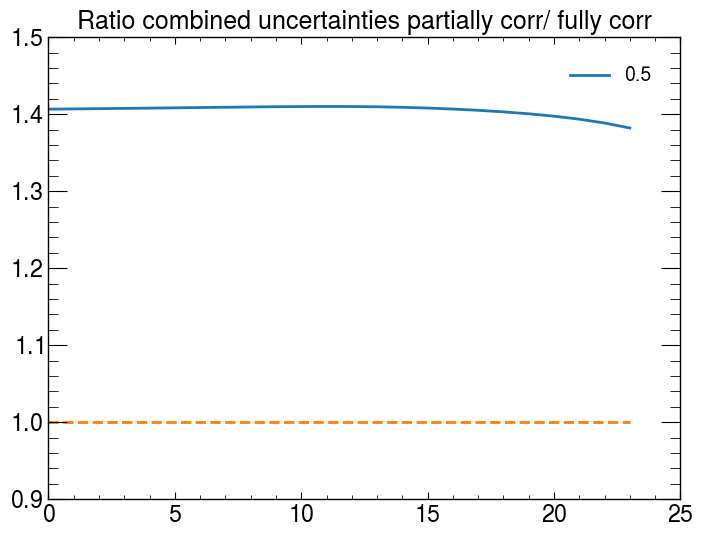

In [1358]:
plt.title('Ratio combined uncertainties partially corr/ fully corr', fontsize=18)
plt.plot(np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat)), label=del_17_18)
plt.plot(np.ones(len(corr_sys)), '--')
plt.legend()
# plt.ylim(0.8,1.2)

In [ ]:
# rho_0_1  = np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat))
# rho_0_3  = np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat))
# rho_0_5  = np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat))
# rho_0_7  = np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat))
# rho_0_9  = np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat))
# rho_0_99 = np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat))

(0.8, 1.2)

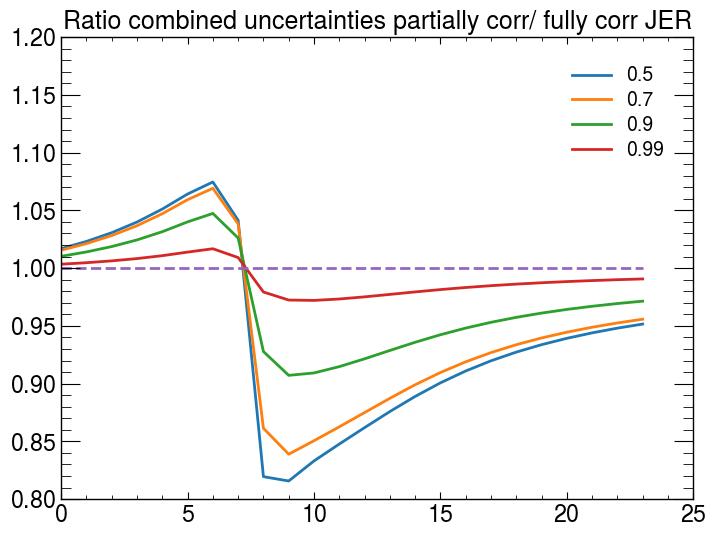

In [1137]:
# plt.title('Ratio combined uncertainties partially corr/ fully corr JER', fontsize=18)
# # plt.plot(rho_0_1 , label="0.1")
# # plt.plot(rho_0_3 , label="0.3")
# plt.plot(rho_0_5 , label="0.5")
# plt.plot(rho_0_7 , label="0.7")
# plt.plot(rho_0_9 , label="0.9")
# plt.plot(rho_0_99, label="0.99")
# plt.plot(np.ones(len(corr_sys)), '--')
# plt.legend()
# plt.ylim(0.8,1.2)

In [1134]:
rho_0_3

array([1.01553347, 1.02125957, 1.02821994, 1.0367369 , 1.04713637,
       1.05927897, 1.06911664, 1.03831906, 0.86136674, 0.83890272,
       0.8505779 , 0.86260472, 0.87494186, 0.88728476, 0.8990089 ,
       0.90961065, 0.91888735, 0.92686932, 0.93369487, 0.9395294 ,
       0.94452941, 0.94883018, 0.95254529, 0.95576986])

In [1135]:
rho_0_5

array([1.01692184, 1.0231451 , 1.03069767, 1.0399188 , 1.05114101,
       1.06417178, 1.07458178, 1.04141089, 0.81946602, 0.81570545,
       0.833092  , 0.84770141, 0.86189943, 0.87581131, 0.88889873,
       0.9006722 , 0.91094201, 0.91975999, 0.92728901, 0.93371742,
       0.93922128, 0.94395185, 0.94803565, 0.95157833])

In [779]:
cratio = ROOT.TCanvas("cratio", "cratio", 600, 1800)
cratio.Divide(1,3)

cratio.cd(1)
cov_tot.SetTitle('Covariance matrix fully correlated')
cov_tot.Draw("colz")
# JES_UP_corr.Scale(1/JES_UP_corr.Integral())

cratio.cd(2)
cov_tot_corr.SetTitle('Covariance matrix partially correlated')
cov_tot_corr.Draw("colz")

cratio.cd(3)
ratio = cov_tot.Clone()
ratio.Divide(cov_tot_corr)
ratio.SetTitle('Ratio Cov tot fully corr / Cov tot partially corr')
ratio.Draw("colz")
cratio.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cratio
